2017 Edition

In this notebook, we will learn how to solve the regression problem of predicting flight delays, using decision trees and random forests.

# Goals
The main goals of this project are the following:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fundamentals of Decision Trees and Random Forests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. They are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *dimensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`. 
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural question would be "does it rain now?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selection of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Use case: Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the journey of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Innovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departure time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration
Now it's time to apply the simple methodology outlined in section 2.3 on the use case of this notebook.
<div class="alert alert-danger">
**Note:** The source code in this lecture should be executed sequentially in the order.
</div>

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparison operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this use case, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accessed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we cannot create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [1]:
import os
import sys
import re
import math
from time import time
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
from operator import add
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches

# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1

<div class="alert alert-info">

How many records (rows) in the RAW data?

</div>

In [2]:
print("number of rows before cleaning:", raw_data.count())

number of rows before cleaning: 5180049


#### Question 1.2


<div class="alert alert-info">
Except for the first column, the others might contain missing values, which are denoted by `NA`.  

Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?  

<div class="label label-danger">**NOTE**:</div> be careful with the valid values that can contain string `NA` inside.
</div>

In [3]:
# extract the header
header = raw_data.first()

# replace invalid data with NULL and remove header
cleaned_data = (raw_data\
        # filter out the header
        .filter(lambda line: line != header)
        # replace the missing values with empty characters
        .map(lambda l: re.sub(r'\b,NA\b', ',', l) )
        )

print("number of rows after cleaning:", cleaned_data.count())

number of rows after cleaning: 5180048



## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [4]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [5]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

### Question 2

<div class="alert alert-info">
From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.  

Note that, we should only select the necessary features defined above:  

[ `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`].  

Finally, the data should be cached.
</div>

In [6]:
# create dataframe df
df = sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema)\
    .select(['year', 'month', 'day_of_month', 'day_of_week',
            'scheduled_departure_time','scheduled_arrival_time',
            'arrival_delay', 'distance',  'departure_delay', 
            'src_airport', 'dest_airport', 'carrier', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])\
    .cache()

## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports?
  - How many unique destination airports?
  - How many carriers?
  - How many flights that have a scheduled departure time later than 18h00?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic)?
  - Which are the top 20 busiest carriers?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day?
  - Which hours of the day are characterized by the longest flight delay?
  - What are the fluctuation of the percentage of delayed flights over different time granularities?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?

### Question 3: Basic queries

#### Question 3.1 
<div class="alert alert-info">
How many origin airports? How many destination airports?
</div>

In [7]:
num_src_airport = df.select('src_airport').distinct().count()
num_dest_airport = df.select('dest_airport').distinct().count()
print("number of origin airports ", num_src_airport)
print("number of destination airports ", num_dest_airport)


number of origin airports  224
number of destination airports  225


In [8]:
d=num_dest_airport = df.select('dest_airport').distinct()
s=num_src_airport = df.select('src_airport').distinct()
u=d.unionAll(s).groupBy('dest_airport').count().orderBy('count').show(5)

+------------+-----+
|dest_airport|count|
+------------+-----+
|         SPN|    1|
|         BFI|    1|
|         GUM|    1|
|         GRB|    2|
|         MSN|    2|
+------------+-----+
only showing top 5 rows



# Comment
<div class="alert alert-warning"> 
When we compare the number of distinct origin airports (224) and the number of destination airports (225), we can say that there should be at least one airport that is the destination of some flights but there are no direct flights that have an origin that airport.
Therefore, we decided to see which airport it is and if it is the unique one in our data, but we found out that there are:
<li>Two destination airports that are "BFI" and "GUM" that were not the source of any flight in the dataset
<li>One source airport "SPN" that wasn't the destination of any flight

</div>

#### Question 3.2
<div class="alert alert-info">
How many carriers?
</div>

In [9]:
num_carrier = df.select('carrier').distinct().count()
print("the number distinct carriers:", num_carrier)

the number distinct carriers: 10


#### Question 3.3

<div class="alert alert-info">
How many night flights (that is, flights departing later than 6pm)?
</div>

In [10]:

print("the number of night flights:", df[df.scheduled_departure_time > 1800].count())


the number of night flights: 1078203


### Question 4: Flight volume statistics

#### Question 4.1: 

<div class="alert alert-info">
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.
</div>


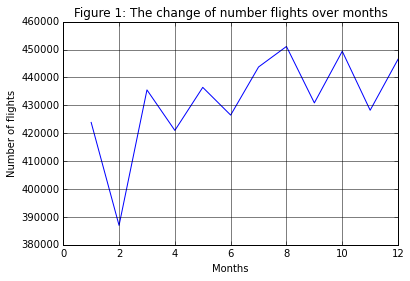

In [11]:
statistic_month = df[df.year == 1994].groupby('month').count().orderBy('month', ascending=1).take(12)
#statistic_day_of_week.show()
#x = statistic_month.select('month')
#y = statistic_month.select('count')
pdfm = pd.DataFrame(data=statistic_month)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1: The change of number flights over months')
plt.grid(True,which="both",ls="-")
plt.plot(pdfm[0], pdfm[1])
plt.show()

<div class="alert alert-warning"> The number of flights varies from one month to another but the margin is somehow huge between the month with the highest number of flights (August) and the one with the lowest number (February).<br> 
The number of flights in January and March (the predecessor and the successor of February) do not differ a lot and they’re close to the average number of flights in a month of 1994. <br>
This may be affected by the fact that February had only 28 days in 1994 because as we can see the curve fluctuates when going from a 30-day month to a 31-day month and vice versa. There’s a difference though in terms of seasons: The first half of the year has a lower average than the second half which can be related to summer holidays and vacations.  </div>

#### Question 4.2: 
<div class="alert alert-info">
Is there any relationship between the number of flights and the days of the week?  

Plot a bar chart and interpret the figure.  

By answering this question, we could learn about the importance of the weekend/weekday feature for our predictive task.
</div>

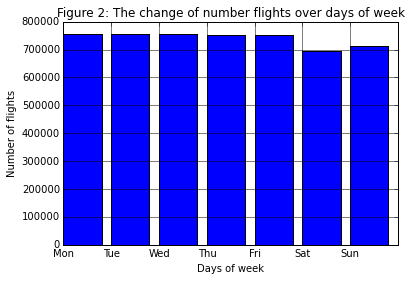

In [12]:
statistic_day_of_week = df[df.year == 1994].groupby('day_of_week').count().orderBy('day_of_week', ascending=1).take(7)
#statistic_day_of_week.show()
pdfdw = pd.DataFrame(data=statistic_day_of_week)
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2: The change of number flights over days of week')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdfdw[0].map(lambda i: map_int_into_day[i])

# plot bar chart
plt.bar(pdfdw[0], pdfdw[1])

plt.xticks(pdfdw[0], day_of_week_label)
plt.show()


<div class="alert alert-warning"> There were 53 Saturdays and 52 of each of the other days of the week in 1994. However, surprisingly, the total number of flights that took place on Saturdays is the lowest among the days of the week. <br>
The number of flights during the weekend is lower than the other days of the week so having a feature indicating whether it is a weekend or not will improve the prediction operation.
 </div>

#### Question 4.3
<div class="alert alert-info">
How many flights in different days of months and in different hours of days?  

Plot  bar charts, and interpret your figures.
</div>

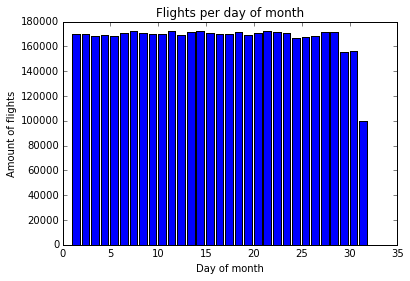

In [13]:
statistic_day_of_month = df[df.year == 1994].groupby('day_of_month').count().orderBy('day_of_month', ascending=1).take(31)
#statistic_day_of_month.show()
pdfdm = pd.DataFrame(data=statistic_day_of_month)

# plot bar chart
plt.bar(pdfdm[0], pdfdm[1])
plt.ylabel('Amount of flights')
plt.xlabel('Day of month')
plt.title('Flights per day of month')
plt.show()

<div class="alert alert-warning"> 
<u>Flights over days of month:</u> <br>
The repartition of the number of flights over the days of month is somehow sustainable for the first 28 days. But for the 29th and 30th day, it’s less because February had just 28 days in 1994.
31st day is the lowest because only 7 months have 31 days.
</div>

In [14]:
#Our first approach
t0 = time()
hours = []
for i in range(0,25):
    hours.append((i, df[(df.scheduled_departure_time >= i*100) & (df.scheduled_departure_time < i*100+100)].count()))
print(hours)
print("\n")
t1 = time()
print("Time: ", t1-t0)

[(0, 13641), (1, 12825), (2, 2842), (3, 564), (4, 486), (5, 13357), (6, 257486), (7, 398796), (8, 397060), (9, 341597), (10, 300375), (11, 313577), (12, 356830), (13, 360762), (14, 294214), (15, 313131), (16, 317809), (17, 368695), (18, 338147), (19, 287033), (20, 232898), (21, 168138), (22, 52395), (23, 37389), (24, 1)]


Time:  5.007620573043823


In [15]:
#Our second approach
t0 = time()
print(df.select('scheduled_departure_time').orderBy('scheduled_departure_time').rdd.map(lambda x: (math.floor(x[0]/100),1) ).reduceByKey(add).collect())
t1 = time()
print("\n")
print("Time: ", t1-t0)

[(0, 13641), (1, 12825), (2, 2842), (3, 564), (4, 486), (5, 13357), (6, 257486), (7, 398796), (8, 397060), (9, 341597), (10, 300375), (11, 313577), (12, 356830), (13, 360762), (14, 294214), (15, 313131), (16, 317809), (17, 368695), (18, 338147), (19, 287033), (20, 232898), (21, 168138), (22, 52395), (23, 37389), (24, 1)]


Time:  6.786088943481445


In [16]:
#Our third approach (with tips from professor's code later on..)
t0 = time()
dfrounded = df.withColumn('hour', floor(df.scheduled_departure_time/100)).groupby('hour').count().orderBy('hour')
dfrounded.show(3)
t1 = time()
print("Time1: ", t1-t0)

+----+-----+
|hour|count|
+----+-----+
|   0|13641|
|   1|12825|
|   2| 2842|
+----+-----+
only showing top 3 rows

Time1:  0.7233669757843018


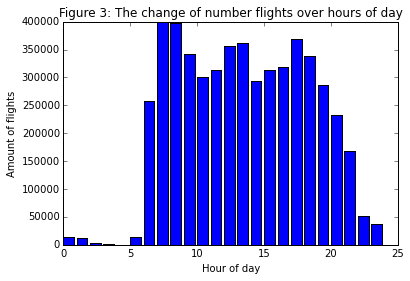

In [17]:
pdfdt = pd.DataFrame(data=dfrounded.take(25))

plt.title('Figure 3: The change of number flights over hours of day')
plt.bar(pdfdt[0], pdfdt[1])
plt.ylabel('Amount of flights')
plt.xlabel('Hour of day')
plt.show()

In [18]:
df[df.scheduled_departure_time > 2399].show()

+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+---------------+-----------+------------+-------+-------------+-------------+---------+--------------+-------------------+
|year|month|day_of_month|day_of_week|scheduled_departure_time|scheduled_arrival_time|arrival_delay|distance|departure_delay|src_airport|dest_airport|carrier|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|
+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+---------------+-----------+------------+-------+-------------+-------------+---------+--------------+-------------------+
|1994|    1|          26|          3|                    2400|                    34|            7|     533|             10|        MCI|         DEN|     AA|         null|         null|     null|          null|               null|
+----+-----+------------+-----------+------------------------+--------------

<div class="alert alert-warning"> 
<u>Flights over hours of day:</u> <br>
The number of flights is the lowest from 10pm till 6am. But starting from 6 am the number of flights increased sharply and reaches the maximum of 400,000 between 7am and 9am<br>
There is a flight in our dataset that took place at "24h00"
</div>

#### Question 4.4
<div class="alert alert-info">
Which are the **top 20** busiest airports: compute this in terms of aggregate inbound and outbound number of flights?
</div>

In [19]:
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('src_count'))
            )
    
# consider inbound flights
stat_dest = (df
            .groupBy(df.dest_airport)
            .agg(func.count('*').alias('dest_count'))
            )


# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(stat_dest, stat_src.src_airport == stat_dest.dest_airport , 'outer')

# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('Total', stat_airports['src_count'] + stat_airports['dest_count'])
                            # select top airpoint in termns of number of flights
                            .select(['src_airport','Total']).orderBy(desc('Total'))
                        )


stat_airport_traffic.withColumnRenamed('src_airport','Airport').show(20)

#stat_airports.show()

+-------+------+
|Airport| Total|
+-------+------+
|    ORD|561461|
|    DFW|516523|
|    ATL|443074|
|    LAX|306453|
|    STL|304409|
|    DEN|285526|
|    PHX|280560|
|    DTW|276272|
|    PIT|262939|
|    CLT|259712|
|    MSP|247980|
|    SFO|235478|
|    EWR|233991|
|    IAH|208591|
|    LGA|203362|
|    BOS|199696|
|    LAS|189920|
|    PHL|186897|
|    DCA|176115|
|    MCO|153720|
+-------+------+
only showing top 20 rows



#### Question 4.5
<div class="alert alert-info">
Which are the **top 20** busiest carriers: compute this in terms of number of flights? 
</div>


In [20]:
stat_carrier = (df
                .groupBy('carrier')
                .agg(func.count('*').alias('Total'))
                .orderBy(desc('Total'))
                )

stat_carrier.show(20)

+-------+------+
|carrier| Total|
+-------+------+
|     DL|874526|
|     US|857906|
|     AA|722277|
|     UA|638750|
|     WN|565426|
|     CO|484834|
|     NW|482798|
|     TW|258205|
|     HP|177851|
|     AS|117475|
+-------+------+



### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
<div class="alert alert-info">
What is the percentage of delayed flights for different hours of the day?  

Plot a bar chart and interpret the figure.  


<div class="label label-success">Remember</div> a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.
</div>

In [21]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', floor(df.scheduled_departure_time/100))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy('hour')

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = (
            delay_ratio_per_hour
                .orderBy('delay_ratio')
                .select(['hour', 'delay_ratio'])
    )

pdf_delay_ratio_per_hour = pd.DataFrame(data=delay_ratio_per_hour.take(25))

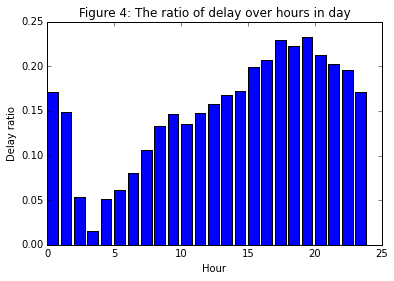

In [22]:
# plot a bar chart

plt.bar(pdf_delay_ratio_per_hour[0],pdf_delay_ratio_per_hour[1])
plt.title('Figure 4: The ratio of delay over hours in day')
plt.xlabel('Hour')
plt.ylabel('Delay ratio')
plt.show()

<div class="alert alert-warning"> 
The ratio of flight delays between midnight and 5am is important when taking into consideration the fact that within those hours of the day, the number of flights is so low. <br>
But in all cases, the ratio of delay does't exceed 25% of the total number of flights in each hour.
The lowest ratio is from 3am to 4am.
</div>

#### Question 5.2
<div class="alert alert-info">
You will realize that saying *"at 4 A.M. there is a very low chance of a flight being delayed"* is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for an early flight to be delayed, but if it does, the delay might be huge, like 6 hours!  

<ul></ul>

Then, the question is: **which hours of the day are characterized by the largest delay?**  

Plot a Bar chart and explain it.  

</div>

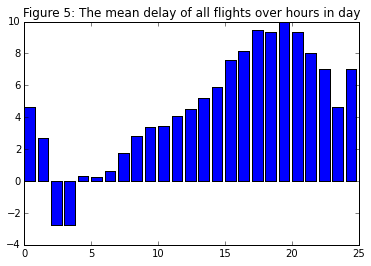

In [23]:
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_hour = (
    mean_delay_per_hour
        .orderBy('hour')
        .select(['hour','mean_delay'])
    )
    
pdf_mean_delay_per_hour = pd.DataFrame(data = mean_delay_per_hour.collect())

plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1])
plt.title('Figure 5: The mean delay of all flights over hours in day')
plt.show()

<div class="alert alert-warning"> 
For the value between 24h and 25h, it’s an outlier  and it represents just one flight that, according to hour dataset, took place at 24h which should be 00h. Its delay is 7mins and we will ignore it.<br>
So, if we average the arrival delays (late arrival, on-time arrival and early arrival) in each hour, we find that the mean increases starting from 2am to reach a positive maximum between 7pm and 8pm and then starts decreasing until reaching a negative minimum between 2am and 4am.<br>
The negative average means that in average, flights arrive about 3mins before their scheduled arrival time.
</div>

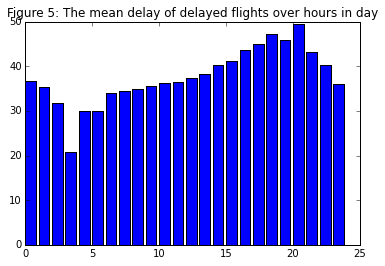

In [24]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour2 = df_with_delay.filter(df_with_delay.is_delay == 1).withColumn('hour', floor(df.scheduled_departure_time/100))

# group by year and hour
statistic_delay_hour2 = delay_per_hour2.groupBy('hour')




mean_delay_per_hour2 = statistic_delay_hour2.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_hour2 = (
    mean_delay_per_hour2
        .orderBy('hour')
        .select(['hour','mean_delay'])
    )
    
pdf_mean_delay_per_hour2 = pd.DataFrame(data = mean_delay_per_hour2.take(25))

plt.bar(pdf_mean_delay_per_hour2[0],pdf_mean_delay_per_hour2[1])
plt.title('Figure 5: The mean delay of delayed flights over hours in day')
plt.show()

<div class="alert alert-warning"> 
The 24h00  flight is not represented now because it’s not considered as delayed since its arrival delay was lower than 15mins.
The average delay of delayed flights has a minimum between 3am and 4am which is about 20mins. The fact that this average is 20mins and that in average, the aircraft arrives earlier than its scheduled arrival time (the lowest negative arrival delay) between 3am and 4am proves that the ratio of delays is the lowest among hours of the day.<br>
The maximum mean delay of delayed flights is about 50mn between 20h and 21h.
</div>

With data of year 1994, the flight from 3AM to 4AM often depart earlier than in their schedule. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

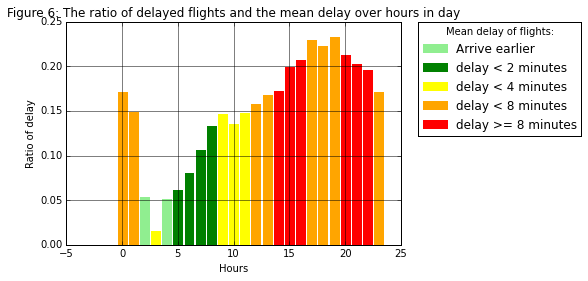

In [25]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())

plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The ratio of delayed flights and the mean delay over hours in day')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        

patch1 = mpatches.Patch(color='lightgreen', label='Arrive earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(title="Mean delay of flights:",handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<div class="alert alert-warning"> 
We couldn't figure out why the colors do not correspond to the previous results although the dara we are using is correct
</div>

In the new figure (Figure 6), we have more information in a single plot. The flights in 3AM to 4AM have very low probability of being delayed, and actually depart earlier than their schedule. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed: in more than 50% of the cases, the delay is 8 minutes or more.

This example shows us that the way representing results are also important.


<div class="alert alert-warning"> 
After seeing the above charts and reading the texts, we started discussing about the role of departure delay and arrival delay. Which one is more important, and what is their relation? We came into conclusion that arrival delay is usually the relevant parameter, as intuitively a passanger should be happy to arrive in time even if the departure was late.
<br><br>

We were then discussing about the relation of departure and arrival delays. Flights could be able to catch up late departure times by flying faster than the scheduled plan and still arrive on time. But it might not be economical. We thus decided to see how the relation between departure and arrival delays looks like according to our data.
</div>

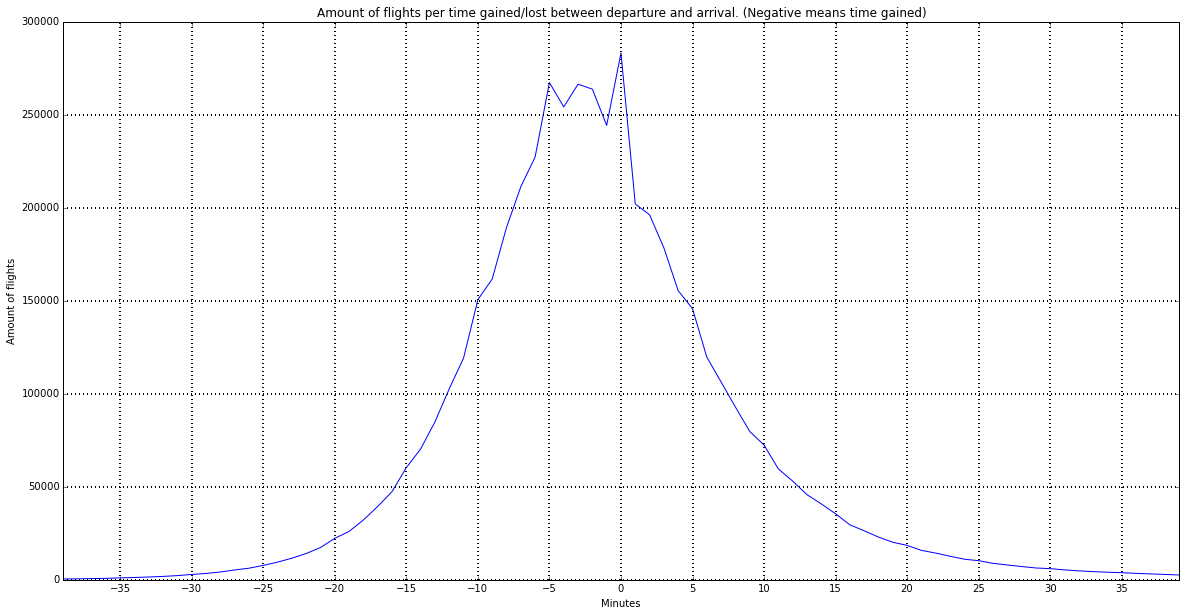

In [26]:
fig = plt.figure(figsize=(20,10))    


df_with_delaydiff = df_with_delay.withColumn('delay_diff', df_with_delay.arrival_delay - df_with_delay.departure_delay).groupBy('delay_diff').count().orderBy('delay_diff')


dfwddf = df_with_delaydiff.filter(df_with_delaydiff['delay_diff'] > -40).filter(df_with_delaydiff['delay_diff'] < 40)


pdf = pd.DataFrame(data=dfwddf.collect())
plt.xticks(np.arange(-45, 45, 5))
plt.grid(linewidth=2)
plt.title("Amount of flights per time gained/lost between departure and arrival. (Negative means time gained)")
plt.xlabel("Minutes")
plt.ylabel("Amount of flights")
plt.plot(pdf[0],pdf[1])

plt.show()

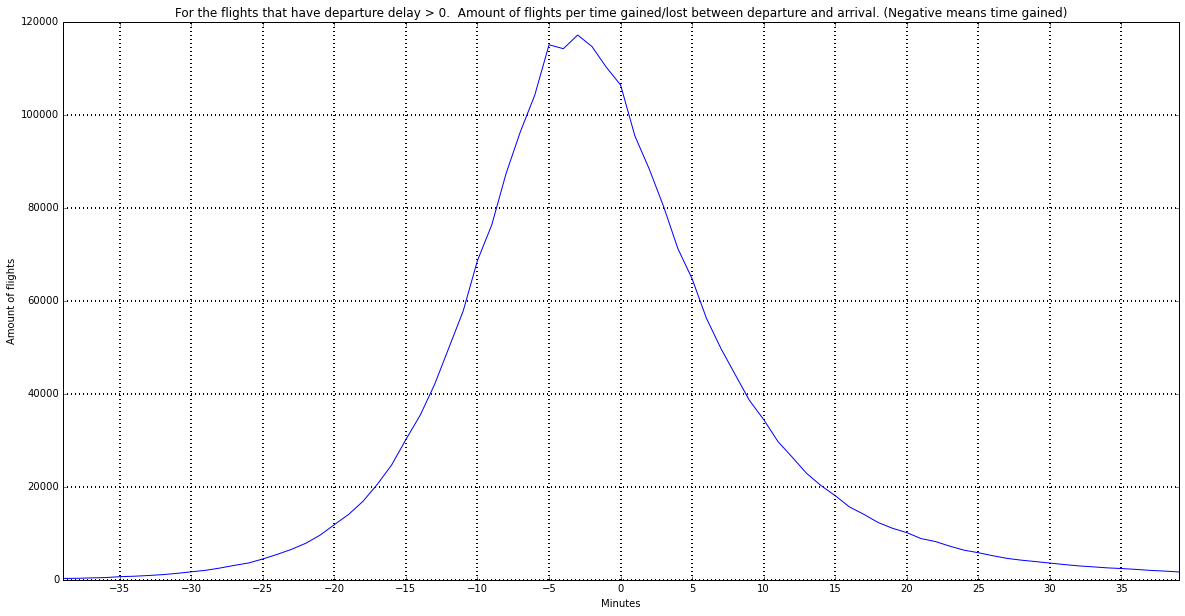

In [27]:
fig = plt.figure(figsize=(20,10))    


df_with_delaydiff = df_with_delay.filter(df_with_delay['departure_delay'] > 0).withColumn('delay_diff', df_with_delay.arrival_delay - df_with_delay.departure_delay).groupBy('delay_diff').count().orderBy('delay_diff')


dfwddf = df_with_delaydiff.filter(df_with_delaydiff['delay_diff'] > -40).filter(df_with_delaydiff['delay_diff'] < 40)


pdf = pd.DataFrame(data=dfwddf.collect())
plt.xticks(np.arange(-45, 45, 5))
plt.grid(linewidth=2)
plt.title("For the flights that have departure delay > 0.  Amount of flights per time gained/lost between departure and arrival. (Negative means time gained)")
plt.xlabel("Minutes")
plt.ylabel("Amount of flights")
plt.plot(pdf[0],pdf[1])

plt.show()

<div class="alert alert-warning"> 
According to the first graph, it seems that the difference of departure and arrival time is some what normally distributed. The majority of the flights seem to be between -10 and +5 minutes of difference, while the mean difference being around -4. This indicates that all flights are on average catching up their shedule while transit for about four minutes. We deduce that this means that actually the carriers have around four minutes of slack in the schedule, in order to cover up for possible delays they are anticipating.
<br><br>
Interestingly, the second graph, that covers only flights that have departed after their scheduled time, indicates that the distribution is roughly speaking identical with the first graph. We can thus deduce that there is no major trend of flight speeds being altered based on delays. This might be because of a determined flight speed being the most economical as well as ecological, though based on the data we cannot know, and should go ask the carrier staff instead.

</div>

#### Question 5.3
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a month
</div>

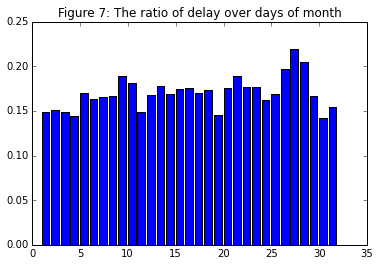

In [28]:
####### The changes of delay ratio over days of month ########
# calculate the delay ratio in each day of month
statistic_day_of_month = (
    df_with_delay
        .groupBy('day_of_month')
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        # order by day_of_month
        .orderBy('day_of_month')
    )
    
# collect data and plot
pdf_day_of_month = pd.DataFrame(data = statistic_day_of_month.take(35))

plt.bar(pdf_day_of_month[0], pdf_day_of_month[1])
plt.title('Figure 7: The ratio of delay over days of month')
plt.show()

<div class="alert alert-warning"> 
The highest ratios of delay correspond to the 26th, 27th and 29th days of a month and the lowest ratios correspond to the first four days of a month, the 11th, the 19th and the last 2 days of the month.
</div>

#### Question 5.4
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a week
</div>

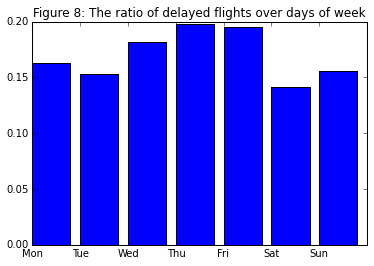

In [29]:
####### The changes of delay ratio over days of week ########
# calculate the delay ratio in each day of week
statistic_day_of_week = (
    df_with_delay
        .groupBy('day_of_week')
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        # order by day_of_week
        .orderBy('day_of_week')
    )
    
# collect data and plot
pdf_day_of_week = pd.DataFrame(data = statistic_day_of_week.take(10))
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week[0].map(lambda i: map_int_into_day[i])

plt.bar(pdf_day_of_week[0],pdf_day_of_week[1])

plt.title('Figure 8: The ratio of delayed flights over days of week')
plt.xticks(pdf_day_of_week[0], day_of_week_label)
plt.show()

<div class="alert alert-warning">
The lowest ratio corresponds to Saturday it might be related to the fact that it has the lowest number of flights in the week.
But although Monday, till Friday have the same number of flights, the delay ratio differs and having a minimum on Tuesday which is almost the same as for Sunday (Sunday has a lower number of flights though). This makes us think that the delay doesn’t depend only on the number of flights in a specific day.
</div>

#### Question 5.5
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over months in a year
</div>

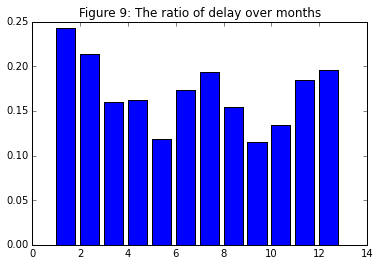

In [30]:
####### The changes of delay ratio over months ########
# calculate the delay ratio in month
statistic_month = (
    df_with_delay
        .groupBy('month')
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        # order by month
        .orderBy('month')
    )
    
# collect data and plot
pdf_month = pd.DataFrame(data = statistic_month.take(15))

plt.bar(pdf_month[0],pdf_month[1])

plt.title('Figure 9: The ratio of delay over months')
plt.show()

<div class="alert alert-warning"> 
January and February have the highest ratios of delay. And the lowest are May, September and October.
The margin between the highest and the lowest is about 0.13
</div>

We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights:

- The probability for a flight to be delayed is low at the beginning or at the very end of a given months
- Flights on two first weekdays and on the weekend, are less likely to be delayed
- May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)

Putting things together, we can have a global picture of the whole year!

In [31]:
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = df_with_delay.groupBy(['year','month', 'day_of_month', 'day_of_week'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))

# assume that we do statistic on year 1994
statistic_day = statistic_day\
    .orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect())

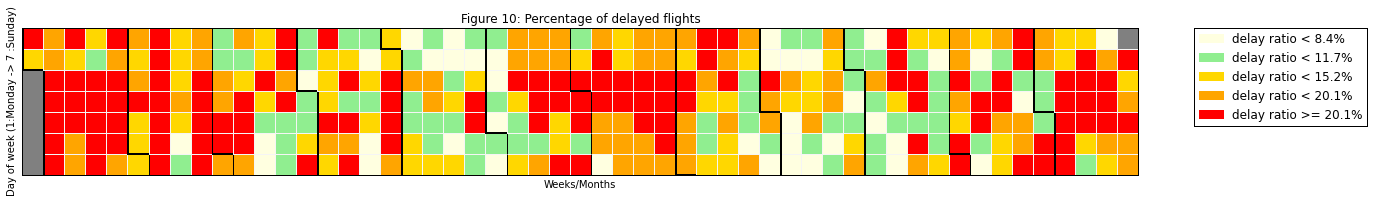

In [32]:
fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)     
plt.xlabel("Weeks/Months")
plt.ylabel("Day of week (1:Monday -> 7 :Sunday)")
plt.title('Figure 10: Percentage of delayed flights')
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf[0])
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf[0][i]
    month = pdf[1][i]
    day_of_month = pdf[2][i]
    day_of_week = pdf[3][i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinate of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    color = 'white'
    if pdf[4][i] <= 0.084:
        color = 'lightyellow'
    elif pdf[4][i] <= 0.117:
        color = 'lightgreen'
    elif pdf[4][i] <= 0.152:
        color = 'gold'
    elif pdf[4][i] <= 0.201:
        color = 'orange'
    else:
        color = 'red'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke')

    ax.add_patch(rect)
    
    # drawing boders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

patch1 = mpatches.Patch(color='lightyellow', label='delay ratio < 8.4%')
patch2 = mpatches.Patch(color='lightgreen', label='delay ratio < 11.7%')
patch3 = mpatches.Patch(color='gold', label='delay ratio < 15.2%')
patch4 = mpatches.Patch(color='orange', label='delay ratio < 20.1%')
patch5 = mpatches.Patch(color='red', label='delay ratio >= 20.1%')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

#### Question 5.6
<div class="alert alert-info">
Explain figure 10.
</div>

<div class="alert alert-warning"> 
This figure represents the 1994 calender. It's representing the days of the week ordered vertically one under the other and the months are separated by a black line.<br>
The red color represents the highest delay ratios and the light yellow represent the lowest delay ratio. The delays are ordered by color from the lowest to the highest: light yellow, light green, gold, orange and red respectively.
So it's better to choose the day of the month that has a lighter color.
This representation agrees with the previous results indicating that the months having the lowest delay ratio are May and September.
</div>

#### Question 5.7
<div class="alert alert-info">

What is the delay probability for the top 20 busiest airports?  


By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relationship between airports, number of flights and the delay.  

<div class="label label-success">HINT </div>  Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.
</div>

In [33]:
####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]
   

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(df_with_delay.src_airport.isin(top_20_airports))
        # group by source airport
        .groupBy(df_with_delay.src_airport)
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['src_airport'])
    )
#statistic_ratio_delay_airport.show(20)

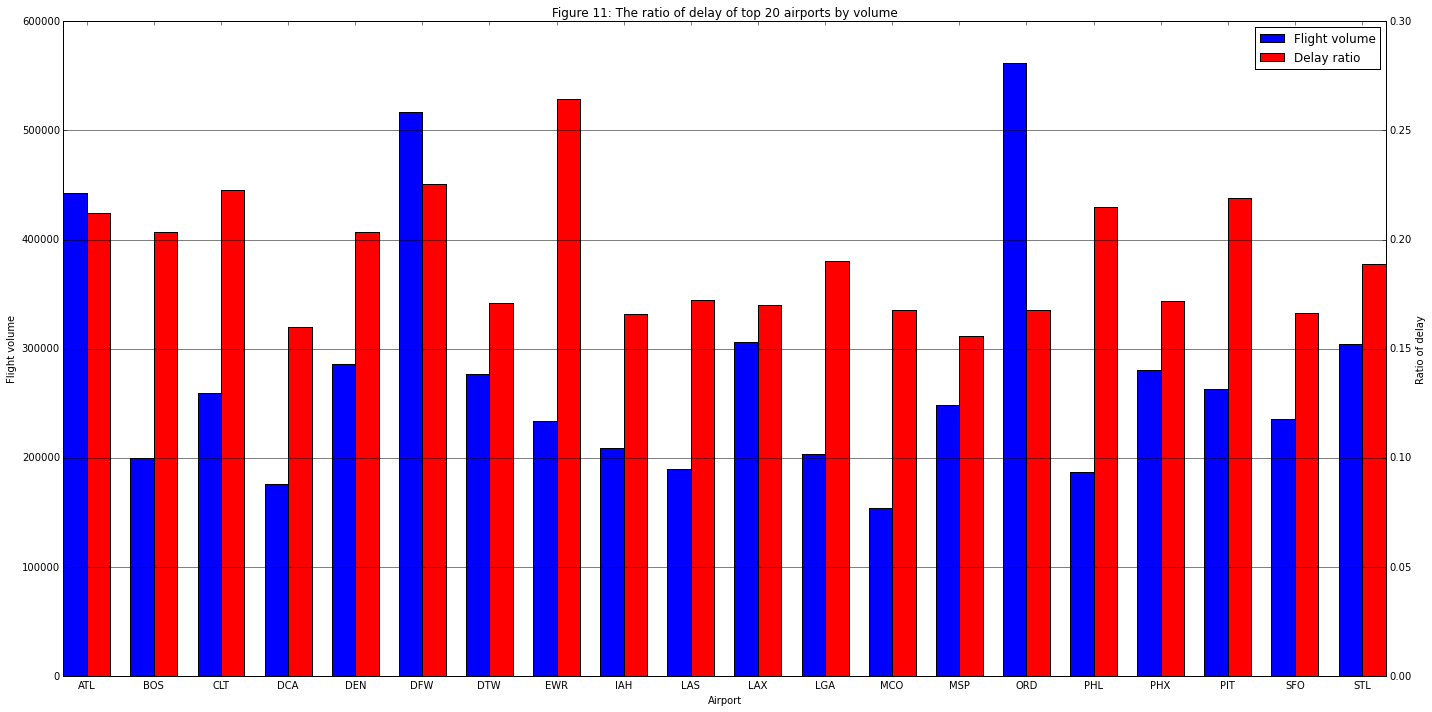

In [34]:
# collect data and plot
pdf_ratio_delay_airport = pd.DataFrame(data=statistic_ratio_delay_airport.collect())
pdf_top_20_airport_volume = pd.DataFrame(data=stat_airport_traffic.take(K), columns=['src_airport', 'total'])
pdf_top_20_airport_volume = pdf_top_20_airport_volume.sort_values(by='src_airport')
#print(pdf_top_20_airport_volume)
index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4
top_20_airports.sort()

fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_airports)
plt.title('Figure 11: The ratio of delay of top 20 airports by volume')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color='b', 
        label='Flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()


<div class="alert alert-warning"> 
This figure proves that the ratio of delay of the top 20 airports in terms of volume does not depend mainly on the number of flights. It might have an impact though. But there should be other factors that affect the variation of the delay.<br>
For example, ORD has the highest volume but 0.22 delay ratio, whereas EWR has less than the half of ORD's volume and above 0.26 delay ratio.
</div>

#### Question 5.8
<div class="alert alert-info">
What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?  
Comment the figure!
</div>

In [35]:
K = 20

# extract top_20_carriers from stat_carrier
top_20_carriers = [item[0] for item in stat_carrier.take(K)]

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong from one of top 20 carriers
        .filter(df_with_delay.carrier.isin(top_20_carriers))
        # group by carriers
        .groupBy(df_with_delay.carrier)
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['carrier'])
    )
statistic_ratio_delay_carrier.show(20)


+-------+-------------------+
|carrier|        delay_ratio|
+-------+-------------------+
|     AA| 0.1752444006939166|
|     AS| 0.1596424771227921|
|     CO| 0.1955576547849367|
|     DL|0.18328443065157582|
|     HP|0.18625141269939444|
|     NW| 0.1294806523639286|
|     TW|0.18212273193780135|
|     UA| 0.1686528375733855|
|     US|0.18422298014001534|
|     WN|0.12829795587751536|
+-------+-------------------+



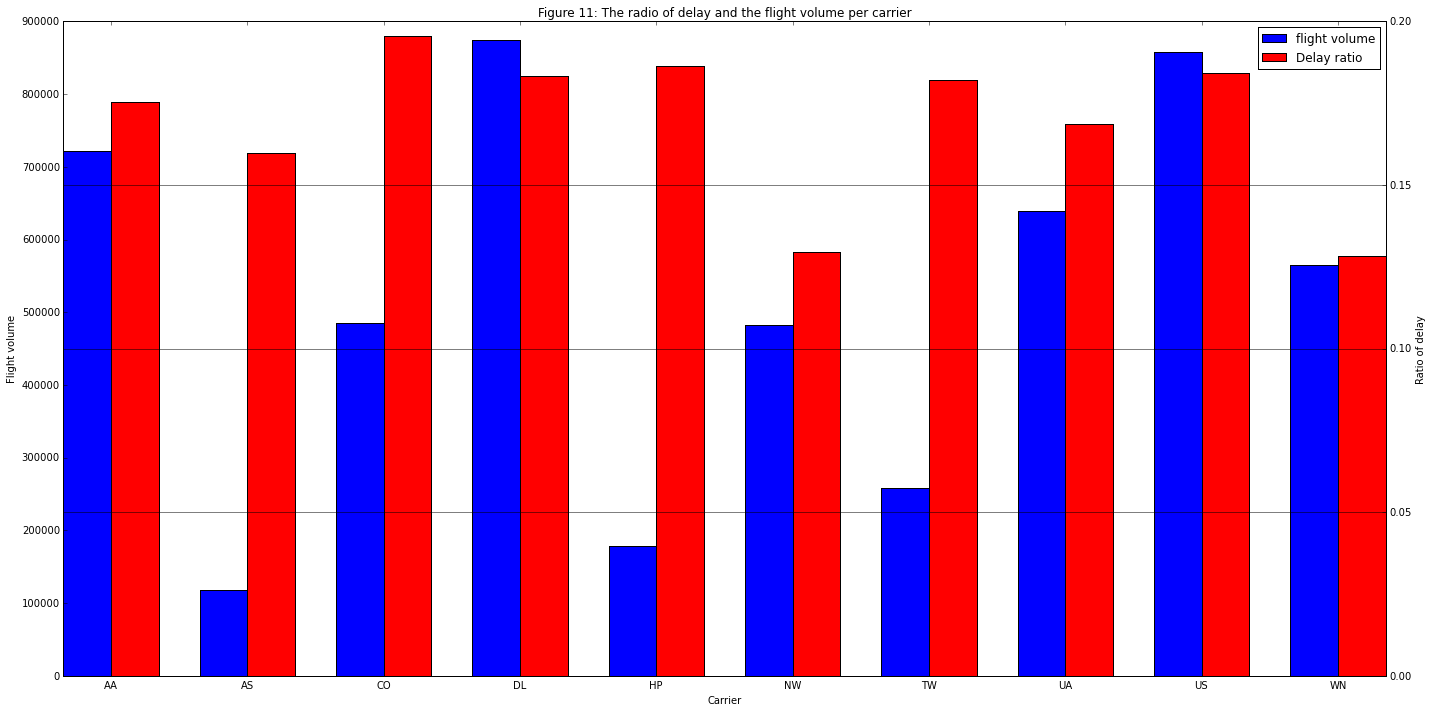

In [50]:
# collect data and plot
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_20_carrier_volume = pd.DataFrame(data=stat_carrier.take(K), columns=['carrier', 'count'])
pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.sort_values(by='carrier')
#print(pdf_top_20_carrier_volume)
top_20_carriers.sort()
index = np.arange(len(top_20_carriers))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_carriers)

plt.title('Figure 11: The radio of delay and the flight volume per carrier')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_carrier_volume['count'], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="alert alert-warning"> 
AS, HP and TW have the lowest volumes but they have high delay ratios. So we can say that the delay depends on the carrier.
</div>

# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This data structure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to a unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with its most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numerical. We can use a naïve approach: map each value of each feature to a unique index.

#### Question 6.1
<div class="alert alert-info">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>

In [37]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
        .groupBy('src_airport')
        .count()
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))



# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

0
2


#### Question 6.2
<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

In [38]:

# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df
        .groupBy('dest_airport')
        .count()
        .orderBy(desc('count'))
    )

# extract the airport names from stat_dest
dest_airports = [item[0] for item in stat_dest.collect()]

num_dest_airports = len(dest_airports)
dest_airports_idx = range(0, num_dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, dest_airports_idx))

# test the dictionary
print(map_dest_airport_to_index['ORD'])
print(map_dest_airport_to_index['ATL'])


0
2


#### Question 6.3
<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

In [39]:
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top


stat_carrier = (
    df
        .groupBy('carrier')
        .count()
        .orderBy(desc('count'))
    )

# extract the carriers names
carriers = [item[0] for item in stat_carrier.collect()]

num_carriers = len(carriers)
carriers_idx = range(0, num_carriers)
map_carriers_to_index = dict(zip(carriers, carriers_idx))


<div class="alert alert-warning"> 
With the dictionaries we are later able to include airport and carrier indexes into the datarows. This because we want to convert all string valued features to numerical ones for the DecionTree.
</div>

## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values: replacing them with the most common value of the corresponding feature.

<div class="alert alert-danger">
**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.
</div>

### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).

#### Question 7.1
<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



In [40]:
the_most_common_month = (
    df
        .groupBy('month')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

The most common month: 8


#### Question 7.2
<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [41]:
the_most_common_day_of_month = (
    df
        .groupBy('day_of_month')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df
        .groupBy('day_of_week')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 11
The most common day of week: 3


#### Question 7.3
<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [42]:
the_most_common_s_departure_time = (
    df
        .groupBy('scheduled_departure_time')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df
        .groupBy('scheduled_arrival_time')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


#### Question 7.4
<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

In [43]:
# calculate mean distance
mean_distance = df.agg(func.mean('distance')).first()[0]

print("mean distance:", mean_distance)

mean distance: 670.7402911985982


#### Question 7.5
<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

In [44]:
# calculate mean arrival delay
mean_arrival_delay = df.agg(func.mean('arrival_delay')).first()[0]
print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 5.662489742613603


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

### Question 8
<div class="alert alert-info">
  o  Replace the missing values of each feature in our data by the corresponding most common value or mean.  

  o  Divide data into two parts: 70% for **training** and 30% for **testing**

</div>

In [45]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week , # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time , # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time , # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                    else map_src_airport_to_index[src_airports_idx[0]], # src_airport
                map_dest_airport_to_index[values[17]] if is_valid(values[17]) \
                    else map_dest_airport_to_index[dest_airports_idx[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()

<div class="alert alert-warning"> 
Here we are preparing the data for the machine learning algorithms. Null values are replaced by appropriate values: mean for continuous features, and most common for categorical values. The data is then split randomly for training and validation purposes.
</div>

## 5.4 Building a decision tree model

### Question 9
<div class="alert alert-info">
We can train a decision model by using function
<code>
`DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.  
</code>  

Where,  
<ul>

<li> `training_data`: the data used for training  </li>

<li> `categorical_info`: a dictionary that maps the index of each categorical features to its number of distinct values  </li>

<li> `impurity_function`: the function that is used to calculate impurity of data in order to select the best split  </li>

<li> `max_depth`: the maximum depth of the tree  </li>

<li> `max_bins`: the maximum number of bins that the algorithm will divide on each feature. </li>

</ul>  

Note that, `max_bins` cannot smaller than the number distinct values of every categorical features.  

Complete the code below to train a decision tree model.
</div>


In [46]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)


## 5.5 Testing the decision tree model

### Question 10
#### Question 10.1
<div class="alert alert-info">
We often use Mean Square Error as a metric to evaluate the quality of a tree model.  

Complete the code below to calculate the MSE of our trained model.
</div>

In [47]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)


testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(testMSE))


Test Mean Squared Error = 489.93688687020267


### Question 10.2
<div class="alert alert-info">
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays?  

Use your own words to describe and interpret the value you obtained for the MSE.
</div>

<div class="alert alert-warning"> 
Here we calculated the Mean Squared Error for our newly trained model. MSE as an error measuring tool penalizes heavily for far off predictions. In otherwords, it is better for the predictions to be all quite close, than having many predictions very close and some really far: overfit is thus penalized heavily. 
<br><br>
The result, almost 500, doesn't look too good for our model. By taking the square root we see that if all the predictions were equally far from the truth, our predictions would be ~23 minutes wrong. Even intuitively one can deduce that a machine learning algorithm should be able to do better.
</div>

## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

### Question 11
<div class="alert alert-info">
Train a random decision forest model and evaluate its quality using MSE metric.  

Compare to decision tree model and comment the results.  

Similarly to question 10.2, comment with your own words the MSE value you have obtained.
</div>

In [48]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)

forestpredictions = forest_model.predict(testData.map(lambda x: x.features))
forestlabelsAndPredictions = testData.map(lambda lp: lp.label).zip(forestpredictions)


foresttestMSE = forestlabelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(foresttestMSE))

Test Mean Squared Error = 480.5941771381796


<div class="alert alert-warning"> PUT YOUR COMMENT HERE </div>

## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-parameter space a little bit.

For more information about parameter tuning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

### Question 12
<div class="alert alert-info">
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on recommender systems, that is using nested for loops.
</div>

<div class="alert alert-danger">
**NOTE:** be careful when selecting parameters as some might imply very long training times, or eventually, the typical memory problems that affect Spark!
</div>

In [49]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
T=[0.0,0.0,0.0,0.0,0.0]
foresttestMSE=[]
for i in range(0,5):
    t0=time()
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                        numTrees=5*(i+1), impurity='variance', maxDepth=12, maxBins=255)
    t1=time()
    T[i]=t1-t0
    forestpredictions = forest_model.predict(testData.map(lambda x: x.features))
    forestlabelsAndPredictions = testData.map(lambda lp: lp.label).zip(forestpredictions)


    foresttestMSE.append(forestlabelsAndPredictions.map(lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean())
    

KeyboardInterrupt: 

In [ ]:
print('Test Mean Squared Error = ' + str(foresttestMSE))
print('Time spent on training',T)

<div class="alert alert-warning"> increasing the number of trees is decreasing the Mean Square error till a minimum reached at numTrees=20 among the tested cases but taking more time  </div>

# 6. Addition (bonus) questions
As you may have noticed, the performance of our statistical models is somehow questionable! What are we missing here? Why is that even using state-of-the-art approaches give poor results?

In what follows, we will try to address some of the limitations of the present Notebook, and provide additional data that might help.

## 6.1. Additional data
In the HDFS file system you have used for running the Notebook, you will notice that there are several other years available (in addition to 1994), which could be used to train a statistical model with more data. In the end, we're playing with "Big Data", hence one might think that feeding more training data to the algorithm should help!

## 6.2. Feature selection

You might think that the flight delays do not only depend on the source airport, destination airport, departure time, etc... as we assumed. They also depend on other features such as the weather, the origin country, the destination city,... To improve the prediction quality, we should consider these features too.

There are some other datasets that related to this use case:

- Airport IATA Codes to City names and Coordinates mapping: http://stat-computing.org/dataexpo/2009/airports.csv
- Carrier codes to Full name mapping: http://stat-computing.org/dataexpo/2009/carriers.csv
- Information about individual planes: http://stat-computing.org/dataexpo/2009/plane-data.csv
- Weather information: http://www.wunderground.com/weather/api/. You can subscribe for free to the developers' API and obtain (at a limited rate) historical weather information in many different formats. Also, to get an idea of the kind of information is available, you can use this link: http://www.wunderground.com/history/


### Question 13
<div class="alert alert-info">
Using the data sources above, select additional feature and repeat the process of defining an appropriate training and test datasets, to evaluate the impact of new features on the performance of the model. Focus first on decision trees, then move to random forests.
</div>

<div class="alert alert-warning"> Here we are reading the csv of year 2006 and cleaning the data, as well as calculating all the relevant values to be inserted in the place of null values. </div>

In [53]:
input_path = "/datasets/airline/2006.csv"
raw_data = sc.textFile(input_path)
# extract the header
header = raw_data.first()
# replace invalid data with NULL and remove header
cleaned_data6 = (raw_data\
        # filter out the header
        .filter(lambda line: line != header)
        # replace the missing values with empty characters
        .map(lambda l: re.sub(r'\b,NA\b', ',', l) )
        )

print("number of rows after cleaning:", cleaned_data6.count())
# convert each line into a tuple of features (columns)


cleaned_data_to_columns = cleaned_data6.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))
    
   

df6 = sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema)\
.select(['year', 'month', 'day_of_month', 'day_of_week',
        'scheduled_departure_time','scheduled_arrival_time',
        'arrival_delay', 'distance',  'departure_delay', 
        'src_airport', 'dest_airport', 'carrier',  'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])\
.cache()

number of rows after cleaning: 7141922


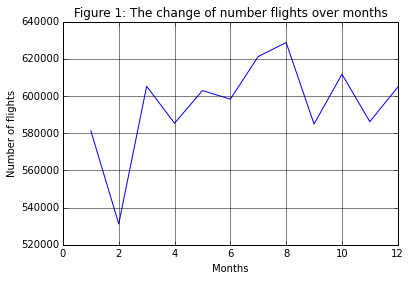

In [54]:
statistic_month = df6[df6.year == 2006].groupBy('month').count().orderBy('month', ascending=1).take(12)
#statistic_day_of_week.show()
#x = statistic_month.select('month')
#y = statistic_month.select('count')
pdfm = pd.DataFrame(data=statistic_month)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1: The change of number flights over months')
plt.grid(True,which="both",ls="-")
plt.plot(pdfm[0], pdfm[1])
plt.show()


In [55]:
mean_delay = df6.select('carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay')
mean_delay.describe().show()

+-------+-----------------+------------------+------------------+--------------------+-------------------+
|summary|    carrier_delay|     weather_delay|         nas_delay|      security_delay|late_aircraft_delay|
+-------+-----------------+------------------+------------------+--------------------+-------------------+
|  count|          7141922|           7141922|           7141922|             7141922|            7141922|
|   mean|3.396185788643449|0.6796269967664167| 3.585969575136777|0.030995997996057643|  4.515005344499702|
| stddev|18.80045806660606| 8.492678450038156|15.627948483952919|  1.2779188178036234| 19.860076242773843|
|    min|                0|                 0|                 0|                   0|                  0|
|    max|             1666|              1163|              1392|                 354|               1366|
+-------+-----------------+------------------+------------------+--------------------+-------------------+



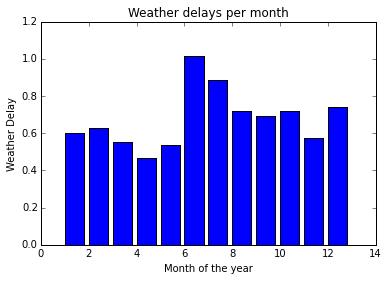

In [56]:
monthly_weather_delay = df6.select('month', 'weather_delay').groupby('month').mean('weather_delay').take(12)
#.agg((func.sum('weather_delay')/func.count('*')).alias('mean_weather_delay'))
#monthly_weather_delay.show()
#print(monthly_weather_delay)
pdf = pd.DataFrame(data=monthly_weather_delay)
# plot bar chart
plt.bar(pdf[0], pdf[1])
plt.ylabel('Weather Delay')
plt.xlabel('Month of the year')
plt.title('Weather delays per month')
plt.show()

In [57]:
df_with_delay = df6.withColumn('is_delay', when(df6['arrival_delay'] >= 15, 1).otherwise(0))

ratio_weather_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('month', 'weather_delay','arrival_delay').groupby('month').agg((func.sum('weather_delay')/func.sum('arrival_delay')).alias('weather_delay_ratio')).orderBy('month')
#ratio_weather_delay.show()
pdfw=pd.DataFrame(data=ratio_weather_delay.collect())

ratio_delay_carrier = df_with_delay.filter(df_with_delay.is_delay == 1).select('month', 'carrier_delay','arrival_delay').groupby('month').agg((func.sum('carrier_delay')/func.sum('arrival_delay')).alias('carrier_delay_ratio')).orderBy('month')
#ratio_delay_carrier.show()
pdfc= pd.DataFrame(data=ratio_delay_carrier.collect())

ratio_nas_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('month', 'nas_delay','arrival_delay').groupby('month').agg((func.sum('nas_delay')/func.sum('arrival_delay')).alias('nas_delay_ratio')).orderBy('month')
#ratio_nas_delay.show()
pdfn=pd.DataFrame(data=ratio_nas_delay.collect())

ratio_security_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('month', 'security_delay','arrival_delay').groupby('month').agg((func.sum('security_delay')/func.sum('arrival_delay')).alias('security_delay_ratio')).orderBy('month')
#ratio_security_delay.show()
pdfs=pd.DataFrame(data=ratio_security_delay.collect())

ratio_late_aircraft_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('month', 'late_aircraft_delay','arrival_delay').groupby('month').agg((func.sum('late_aircraft_delay')/func.sum('arrival_delay')).alias('late_aircraft_delay_ratio')).orderBy('month')
#ratio_late_aircraft_delay.show()
pdfla=pd.DataFrame(data=ratio_late_aircraft_delay.collect())

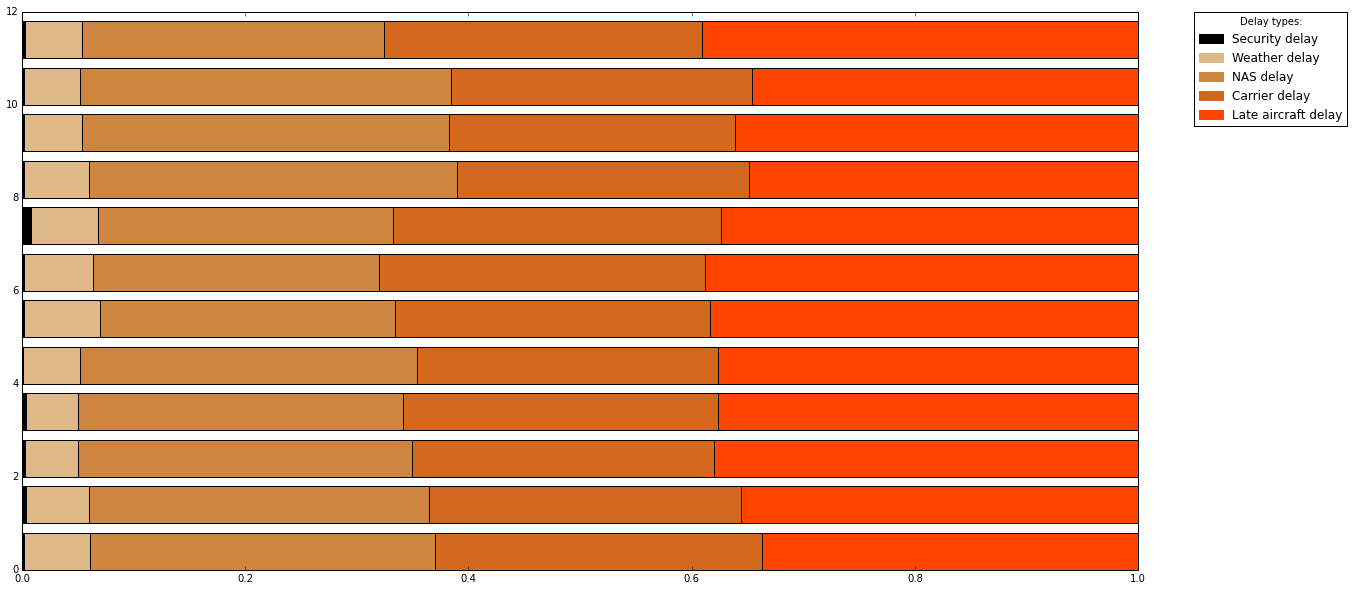

In [58]:
#This is supposed to be a beautiful bar chart having a sum of 1 and containing the percentage of each delay among the total delay. But NO FUNCIONA

X=range(12)


#print(pdfw[1],"\n",pdfc[1],"\n",pdfn[1],"\n",pdfs[1],"\n",pdfla[1],"\n")

plt.figure(figsize=(20,10))
plt.barh(X, pdfs[1], color = 'black')
plt.barh(X, pdfw[1], color = 'burlywood', left = pdfs[1])
plt.barh(X, pdfn[1], color = 'peru', left = pdfs[1]+pdfw[1])
plt.barh(X, pdfc[1], color = 'chocolate', left = pdfs[1]+pdfw[1]+pdfn[1])
plt.barh(X, pdfla[1], color = 'orangered', left = pdfs[1]+pdfw[1]+pdfn[1]+pdfc[1])

patch1 = mpatches.Patch(color='black', label='Security delay')
patch2 = mpatches.Patch(color='burlywood', label='Weather delay')
patch3 = mpatches.Patch(color='peru', label='NAS delay')
patch4 = mpatches.Patch(color='chocolate', label='Carrier delay')
patch5 = mpatches.Patch(color='orangered', label='Late aircraft delay')

plt.legend(title="Delay types:",handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<div class="alert alert-warning"> 
Here we have graphed the composition of the total delay - per each month. The obvious notion is that the three delaysL Late aircraft, Carrier and NAS dominate the total delay heavily. Weather delay has some impact while security delay has next to none. Based on this we can deduce that any optimization we can do on NAS, Carrier or Late aircraft will likely have much higher impact on the accuracy of our results.
</div>

In [59]:
df_with_delay = df6.withColumn('is_delay', when(df6['arrival_delay'] >= 15, 1).otherwise(0))

ratio_weather_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('day_of_week', 'weather_delay','arrival_delay').groupby('day_of_week').agg((func.sum('weather_delay')/func.sum('arrival_delay')).alias('weather_delay_ratio')).orderBy('day_of_week')
#ratio_weather_delay.show()
pdfw=pd.DataFrame(data=ratio_weather_delay.collect())


ratio_delay_carrier = df_with_delay.filter(df_with_delay.is_delay == 1).select('day_of_week', 'carrier_delay','arrival_delay').groupby('day_of_week').agg((func.sum('carrier_delay')/func.sum('arrival_delay')).alias('carrier_delay_ratio')).orderBy('day_of_week')
#ratio_delay_carrier.show()
pdfc= pd.DataFrame(data=ratio_delay_carrier.collect())


ratio_nas_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('day_of_week', 'nas_delay','arrival_delay').groupby('day_of_week').agg((func.sum('nas_delay')/func.sum('arrival_delay')).alias('nas_delay_ratio')).orderBy('day_of_week')
#ratio_nas_delay.show()
pdfn=pd.DataFrame(data=ratio_nas_delay.collect())


ratio_security_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('day_of_week', 'security_delay','arrival_delay').groupby('day_of_week').agg((func.sum('security_delay')/func.sum('arrival_delay')).alias('security_delay_ratio')).orderBy('day_of_week')
#ratio_security_delay.show()
pdfs=pd.DataFrame(data=ratio_security_delay.collect())


ratio_late_aircraft_delay = df_with_delay.filter(df_with_delay.is_delay == 1).select('day_of_week', 'late_aircraft_delay','arrival_delay').groupby('day_of_week').agg((func.sum('late_aircraft_delay')/func.sum('arrival_delay')).alias('late_aircraft_delay_ratio')).orderBy('day_of_week')
#ratio_late_aircraft_delay.show()
pdfla=pd.DataFrame(data=ratio_late_aircraft_delay.collect())


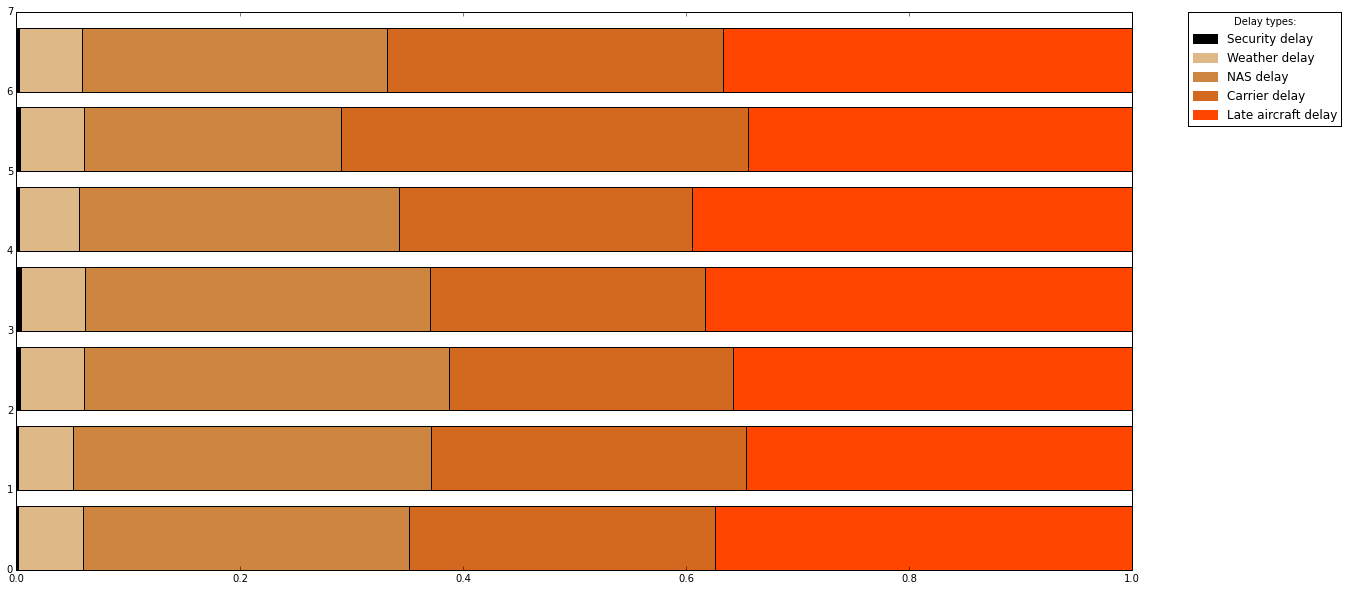

In [60]:
#This is supposed to be a beautiful bar chart having a sum of 1 and containing the percentage of each delay among the total delay. But NO FUNCIONA

X=range(7)


#print(pdfw[1],"\n",pdfc[1],"\n",pdfn[1],"\n",pdfs[1],"\n",pdfla[1],"\n")

plt.figure(figsize=(20,10))
plt.barh(X, pdfs[1], color = 'black')
plt.barh(X, pdfw[1], color = 'burlywood', left = pdfs[1])
plt.barh(X, pdfn[1], color = 'peru', left = pdfs[1]+pdfw[1])
plt.barh(X, pdfc[1], color = 'chocolate', left = pdfs[1]+pdfw[1]+pdfn[1])
plt.barh(X, pdfla[1], color = 'orangered', left = pdfs[1]+pdfw[1]+pdfn[1]+pdfc[1])

patch1 = mpatches.Patch(color='black', label='Security delay')
patch2 = mpatches.Patch(color='burlywood', label='Weather delay')
patch3 = mpatches.Patch(color='peru', label='NAS delay')
patch4 = mpatches.Patch(color='chocolate', label='Carrier delay')
patch5 = mpatches.Patch(color='orangered', label='Late aircraft delay')

plt.legend(title="Delay types:",handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<div class="alert alert-warning"> 
We graphed the same content as before, ie. composition of the total delay, this time per day of week. We can see some some variance over months and weekdays. The only consistant pattern we can identify and rationalize is that weather delays increase in late fall and winter time and that for some reason saturdays have high NAS delay (or low other delays).
</div>

In [61]:
# calculate mean distance
mean_distance = df6.agg(func.mean('distance')).first()[0]
print("mean distance:", mean_distance)

# calculate mean distance
mean_weather_delay = df6.agg(func.mean('weather_delay')).first()[0]
print("mean weather delay:", mean_weather_delay)


mean_carrier_delay = df6.agg(func.mean('carrier_delay')).first()[0]
print("mean carrier delay:", mean_carrier_delay)

mean_nas_delay = df6.agg(func.mean('nas_delay')).first()[0]
print("mean nas delay:", mean_nas_delay)

mean_security_delay = df6.agg(func.mean('security_delay')).first()[0]
print("mean security delay:", mean_security_delay)

mean_late_aircraft_delay = df6.agg(func.mean('late_aircraft_delay')).first()[0]
print("mean late aircraft delay:", mean_late_aircraft_delay)

mean_arrival_delay = df6.agg(func.mean('arrival_delay')).first()[0]
print("mean arrival delay:", mean_arrival_delay)

the_most_common_month = (
    df6
        .groupBy('month')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)


the_most_common_day_of_month = (
    df6
        .groupBy('day_of_month')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df6
        .groupBy('day_of_week')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

the_most_common_s_departure_time = (
    df6
        .groupBy('scheduled_departure_time')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df6
        .groupBy('scheduled_arrival_time')
        .count()
        .orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)


# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df6
        .groupBy('src_airport')
        .count()
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]
num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))


# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df6
        .groupBy('dest_airport')
        .count()
        .orderBy(desc('count'))
    )
# extract the airport names from stat_dest
dest_airports = [item[0] for item in stat_dest.collect()]
num_dest_airports = len(dest_airports)
dest_airports_idx = range(0, num_dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, dest_airports_idx))


# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top
stat_carrier = (
    df6
        .groupBy('carrier')
        .count()
        .orderBy(desc('count'))
    )
# extract the carriers names
carriers = [item[0] for item in stat_carrier.collect()]
num_carriers = len(carriers)
carriers_idx = range(0, num_carriers)
map_carriers_to_index = dict(zip(carriers, carriers_idx))

mean distance: 727.9973892181964
mean weather delay: 0.6796269967664167
mean carrier delay: 3.396185788643449
mean nas delay: 3.585969575136777
mean security delay: 0.030995997996057643
mean late aircraft delay: 4.515005344499702
mean arrival delay: 8.6828402630457
The most common month: 8
The most common day of month: 27
The most common day of week: 5
The most common scheduled departure time: 700
The most common scheduled arrival time: 1830


In [ ]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_data6\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week , # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time , # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time , # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                    else map_src_airport_to_index[src_airports_idx[0]], # src_airport
                map_dest_airport_to_index[values[17]] if is_valid(values[17]) \
                    else map_dest_airport_to_index[dest_airports_idx[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                int(values[24]) if is_valid(values[24]) else mean_weather_delay,
                int(values[25]) if is_valid(values[25]) else mean_carrier_delay,
                int(values[26]) if is_valid(values[26]) else mean_nas_delay,
                int(values[27]) if is_valid(values[27]) else mean_security_delay,
                int(values[28]) if is_valid(values[28]) else mean_late_aircraft_delay,
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()

<div class="alert alert-warning"> 
<li>Training a decision Tree model taking into account 5 types of delays 
<li>maxBins should be bigger than the longest categorical feature.
</div>

In [ ]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

In [ ]:
# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=320)

In [ ]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)


testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(testMSE))


<div class="alert alert-warning"> Test Mean Squared Error = 1199.2997976610861 before adding the 5 delays features
And after taking them into account, the error became: Test Mean Squared Error = 94.90861566809335</div>

In [ ]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=320)

In [ ]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)


testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(testMSE))


<div class="alert alert-warning"> Looking at numTrees change effect:</div>

In [ ]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
T1=[0.0,0.0,0.0,0.0,0.0]
foresttestMSE1=[]
for i in range(0,5):
    t0=time()
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                        numTrees=5*(i+1), impurity='variance', maxDepth=12, maxBins=300)
    t1=time()
    T1[i]=t1-t0
    forestpredictions = forest_model.predict(testData.map(lambda x: x.features))
    forestlabelsAndPredictions = testData.map(lambda lp: lp.label).zip(forestpredictions)


    foresttestMSE1.append(forestlabelsAndPredictions.map(lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean())

In [ ]:
print('Test Mean Squared Error = ' + str(foresttestMSE))
print('Time spent on training',T)

<div class="alert alert-warning"> Looking at maxDepth change effect:</div>

In [ ]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
T=[0.0,0.0,0.0,0.0,0.0]
foresttestMSE=[]
for i in range(0,5):
    t0=time()
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                        numTrees=20, impurity='variance', maxDepth=3*(2+i), maxBins=300)
    t1=time()
    T[i]=t1-t0
    forestpredictions = forest_model.predict(testData.map(lambda x: x.features))
    forestlabelsAndPredictions = testData.map(lambda lp: lp.label).zip(forestpredictions)


    foresttestMSE.append(forestlabelsAndPredictions.map(lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean())

In [ ]:
print('Test Mean Squared Error = ' + str(foresttestMSE))
print('Time spent on training',T)

In [ ]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
T3=[0.0,0.0,0.0,0.0,0.0]
foresttestMSE3=[]
for i in range(0,5):
    t0=time()
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                        numTrees=20, impurity='variance', maxDepth=12, maxBins=300+10*i)
    t1=time()
    T3[i]=t1-t0
    forestpredictions = forest_model.predict(testData.map(lambda x: x.features))
    forestlabelsAndPredictions = testData.map(lambda lp: lp.label).zip(forestpredictions)


    foresttestMSE3.append(forestlabelsAndPredictions.map(lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean())

In [ ]:
print('Test Mean Squared Error = ' + str(foresttestMSE3))
print('Time spent on training',T3)

> The important thing is to not stop questioning. Curiosity has its own reason for existence. (Albert Einstein)

<div class="alert alert-success">
Be active! Ask yourself other questions which help you explore more about this data and try to answer them. Make this notebook be a part of your CV!
</div>

In [ ]:
df6.unpersist()

<div class="alert alert-warning"> We started thinking about how could we improve the features we give the algorithm. This thought process was heavily based on the composition of the delay, as we thought that if we can link some information to a specific delay, it might improve the predictions based on it.
<br><br>
The first notion that we made was that we believe security delay is relative only to a specific airport. Not the plane, not the carrier. We thought that maybe calculating the average security delay for each airport, and adding that average security delay per airport as a feature might improve the algorithm, as we are kind of able to link the delays to the airports. This resulted in an improvement of 3 MSE units.</div>

In [62]:
something = df6.groupby('src_airport').mean('security_delay')


airport_avgsecdel = pd.DataFrame(data=something.collect(), columns=['key', 'value']).set_index('key').to_dict()["value"]



something = something.withColumnRenamed('src_airport', 'src_airport2')


print(airport_avgsecdel["BGM"])

#from pyspark.sql.types import FloatType
#lookupdelay = udf(lambda s: airport_avgsecdel[s], FloatType())


#df6new = df6.withColumn('avgsec', lookupdelay(df6.src_airport))
#df6new.show()



df6new = df6.join(something, df6.src_airport == something.src_airport2, 'left_outer').drop('src_airport2')

df6new.show(10)

0.0
+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+---------------+-----------+------------+-------+-------------+-------------+---------+--------------+-------------------+-------------------+
|year|month|day_of_month|day_of_week|scheduled_departure_time|scheduled_arrival_time|arrival_delay|distance|departure_delay|src_airport|dest_airport|carrier|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay|avg(security_delay)|
+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+---------------+-----------+------------+-------+-------------+-------------+---------+--------------+-------------------+-------------------+
|2006|    3|           1|          3|                     600|                   759|            6|     506|              0|        BGM|         CVG|     OH|            0|            0|        0|             0|                  0|             

<div class="alert alert-warning"> Here we realized that we have been creating our new features in the Dataframe format, and the algorithms have so far been ran with RDDs that have been created directly from reading csvs. Thus, we had to come up with a way of transforming Dataframes into algorithm compatible format. Here we fill the Dataframe's null values with the appropriate values. Then, we add the additional features. Finally we transform the Dataframe with the Vectorassembler into LabeledPoint format, supported by the algorithms.</div>

In [63]:
#print(type(cleaned_data6))
#print(type(df6new.rdd))


# TODO CREATE IS WEEKEND

isweekend = udf(lambda s: 1 if s>=6 else 0, IntegerType())
df6new2 = df6new.withColumn('is_weekend', isweekend(df6.day_of_week))

df6new2 = df6new2.na.fill({
        'arrival_delay': mean_arrival_delay, 
        'month': the_most_common_month,
        'day_of_week': the_most_common_day_of_week,
        'day_of_month': the_most_common_day_of_month,
        'scheduled_departure_time': the_most_common_s_departure_time,
        'scheduled_arrival_time': the_most_common_s_arrival_time,
        'carrier': carriers[0],
        'src_airport': src_airports[0],
        'dest_airport': dest_airports[0],
        'distance': mean_distance,
        'is_weekend': 0,
        'weather_delay': mean_weather_delay,
        'carrier_delay': mean_carrier_delay,
        'nas_delay': mean_nas_delay,
        'late_aircraft_delay': mean_late_aircraft_delay,
        'avg(security_delay)': 0.0
    })

indexing_src_airport = udf(lambda s: map_src_airport_to_index[s], IntegerType())
indexing_dest_airport = udf(lambda s: map_dest_airport_to_index[s], IntegerType())
indexing_carriers = udf(lambda s: map_carriers_to_index[s], IntegerType())


df6new2 = df6new2.select(*[indexing_carriers(column).alias('carrier') if column == 'carrier' else column for column in df6new2.columns])
df6new2 = df6new2.select(*[indexing_src_airport(column).alias('src_airport') if column == 'src_airport' else column for column in df6new2.columns])
df6new2 = df6new2.select(*[indexing_dest_airport(column).alias('dest_airport') if column == 'dest_airport' else column for column in df6new2.columns])





#df6new2.show(1)




from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


assembler = VectorAssembler(
    inputCols=['year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time', 
              'carrier', 'src_airport', 'dest_airport', 'distance', 'is_weekend', 'weather_delay', 'carrier_delay', 
              'nas_delay', 'late_aircraft_delay', 'avg(security_delay)'],
    outputCol='features')
transformed = assembler.transform(df6new2)


from pyspark.mllib import linalg as mllib_linalg
from pyspark.ml import linalg as ml_linalg

def as_old(v):
    if isinstance(v, ml_linalg.SparseVector):
        return mllib_linalg.SparseVector(v.size, v.indices, v.values)
    if isinstance(v, ml_linalg.DenseVector):
        return mllib_linalg.DenseVector(v.values)
    raise ValueError("Unsupported type {0}".format(type(v)))




newRdd = transformed.select(col('arrival_delay').alias("label"), col("features"))\
  .rdd\
  .map(lambda row: LabeledPoint(row.label, as_old(row.features)))

#newRdd.take(1)
(trainingData, testData) = newRdd.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()

In [64]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=320)

In [65]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)


testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(testMSE))


Test Mean Squared Error = 90.23811376971338


<div class="alert alert-warning"> Here we calculated some new features, which included the average NAS per airport, and average NAS per hour, as we thought NAS is correlated to those two parameters, and it might be helpful for the algorithm.</div>

In [66]:

avgnas_per_hour = df6new2.withColumn('hour2', floor(df6new2.scheduled_departure_time/100)).groupby('hour2')\
    .mean('nas_delay').orderBy('hour2').withColumnRenamed('avg(nas_delay)', 'avgnas_per_hour')
avgnas_per_hour.show(30)


+-----+------------------+
|hour2|   avgnas_per_hour|
+-----+------------------+
|    0|1.5173922321809645|
|    1|1.6027844246247553|
|    2|1.5481986368062317|
|    3| 3.470779220779221|
|    4| 2.878846153846154|
|    5|1.3145796534109897|
|    6|1.7095224249625047|
|    7|2.2836003376969476|
|    8|2.4670042352415207|
|    9|2.7163718269388886|
|   10| 2.846195282937973|
|   11| 2.959591348017469|
|   12|3.2559721022857446|
|   13| 4.249948370621218|
|   14| 4.711873024778753|
|   15|4.8595677932629915|
|   16|  5.18269634419743|
|   17| 5.677340954929206|
|   18| 5.012621230843589|
|   19| 4.127283677482793|
|   20| 3.408820756364144|
|   21|2.3548726452521684|
|   22|1.7351154450942905|
|   23|1.8082977681382495|
+-----+------------------+



In [67]:
somethingelse = df6new2.groupby('src_airport').mean('nas_delay').withColumnRenamed('src_airport', 'src_airport2')

df6new3 = df6new2.join(somethingelse, df6new2.src_airport == somethingelse.src_airport2, 'left_outer')\
        .drop('src_airport2').withColumnRenamed('avg(nas_delay)', 'avgnas_per_airport')

df6new4 = df6new3.withColumn('hour', floor(df6new3.scheduled_departure_time/100))

df6new5 = df6new4.join(avgnas_per_hour, df6new4.hour == avgnas_per_hour.hour2, 'left_outer').drop('hour2').drop('hour')



df6new5.show(1)


+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+---------------+-----------+------------+-------+-------------+-------------+---------+--------------+-------------------+--------------------+----------+------------------+-----------------+
|year|month|day_of_month|day_of_week|scheduled_departure_time|scheduled_arrival_time|arrival_delay|distance|departure_delay|src_airport|dest_airport|carrier|carrier_delay|weather_delay|nas_delay|security_delay|late_aircraft_delay| avg(security_delay)|is_weekend|avgnas_per_airport|  avgnas_per_hour|
+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+---------------+-----------+------------+-------+-------------+-------------+---------+--------------+-------------------+--------------------+----------+------------------+-----------------+
|2006|   12|          14|          4|                    1959|                  2140|          177| 

In [68]:
assembler = VectorAssembler(
    inputCols=['year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time', 
              'carrier', 'src_airport', 'dest_airport', 'distance', 'is_weekend', 'weather_delay', 'carrier_delay', 
              'nas_delay', 'late_aircraft_delay', 'avg(security_delay)', 'avgnas_per_airport', 'avgnas_per_hour'],
    outputCol='features')
transformed = assembler.transform(df6new5)

newRdd1 = transformed.select(col('arrival_delay').alias("label"), col("features"))\
  .rdd\
  .map(lambda row: LabeledPoint(row.label, as_old(row.features)))

#newRdd.take(1)
(trainingData, testData) = newRdd1.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()


In [69]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

In [70]:
# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=320)

In [ ]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)


testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(testMSE))



Test Mean Squared Error = 92.02258827622545


In [ ]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=320)

forestpredictions = forest_model.predict(testData.map(lambda x: x.features))
forestlabelsAndPredictions = testData.map(lambda lp: lp.label).zip(forestpredictions)


foresttestMSE = forestlabelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(foresttestMSE))

In [ ]:
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.util import MLUtils



gbtmodel = GradientBoostedTrees.trainRegressor(trainingData, loss="leastSquaresError", maxDepth=12,
                                            categoricalFeaturesInfo=categorical_info, numIterations=10, maxBins=320)

# Evaluate model on test instances and compute test error
gbtpredictions = gbtmodel.predict(testData.map(lambda x: x.features))
gbtlabelsAndPredictions = testData.map(lambda lp: lp.label).zip(gbtpredictions)

gbttestMSE = gbtlabelsAndPredictions.map(
    lambda p: (p[0]-p[1]) * (p[0]-p[1]) ).mean()


print('Test Mean Squared Error = ' + str(gbttestMSE))


<div class="alert alert-warning">
In the end, we compared DecisionTree, RandomForest and GradientBoostedTrees. All their results were quite equal, at 85-95 MSE. Thought Gradient Boosted Trees were the absolute best.

</div>

# Comment
<div class="alert alert-warning">
An important aspect when thinking about creating predictive models for flight delays is the temporal aspect. In what kind of usage will the model be used in the future? It is very different to predict historical data points, as we are doing now, in comparison to predicting future data. Having seen data points after unseen data undermines our principle of the data being truly unseen, as there can be, and likely is, a causality between the data. For example, if we have seen data points saying that flights at 17:00 and 18:00 on 14.12.2006 in JFK were delayed because of bad weather, it's not hard to conclude then that a unseen data point of the same date in JFK at 17:30 is quite likely to be late as well due to weather. Obviously we wouldn't have the same information available for a flight that's going to happen in two weeks, nevertheless a flight leaving in half a year into the future.
<br><br>
The approaches to predicting future data depend on the time frame as well. When predicting one week into the future we might with some reliability have weather forecasts available for that date. Instead, if we we're to predict half a year into the future, we should probably rather rely on historic statistics of the area's climate. In both cases I would assume that it would be better to create a model on what kind of weather conditions affect flight delays (airport dependent), and then look directly at external weather data to do analytics for future weather. Weather is such a complex phenomenon that predicting it through flight data results with vague results due to not enough data.
<br><br>
In the context of this Notebook, if we wanted to replicate more realistic models for prediction, we could use all data until, say, 2007 to create the models, and then predict on the data of 2008. However, due to limited resources it makes sense to focus on a smaller dataset. Which though then omits either the possibility to detect yearly patterns, or the principle of temporal ordering with seen and unseen data. Understanding what the goal is, and what limitations that goal dictates is important in the design and tuning of the models.

</div>

# Summary
In this lecture, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.